# Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari

L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

 - CUST_ID : Identificazione del titolare della carta di credito (Categorico)
 - BALANCE : importo del saldo rimasto sul conto per effettuare acquisti
 - BALANCE_FREQUENCY : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).
 - PURCHASES : Quantità di acquisti effettuati dal conto
 - ONEOFF_PURCHASES : Importo massimo di acquisti effettuati in un'unica soluzione
 - INSTALLMENTS_PURCHASES : Importo degli acquisti effettuati a rate
 - CASH_ADVANCE : Anticipo in contanti dato dall'utente
 - PURCHASES_FREQUENCY : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - ONEOFFPURCHASESFREQUENCY : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - PURCHASESINSTALLMENTSFREQUENCY : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).
 - CASHADVANCEFREQUENCY : frequenza con cui viene pagato l'anticipo in contanti
 - CASHADVANCETRX : Numero di transazioni effettuate con "contanti in anticipo".
 - PURCHASES_TRX : Numero di transazioni di acquisto effettuate
 - CREDIT_LIMIT : Limite della carta di credito dell'utente
 - PAYMENTS  : Importo dei pagamenti effettuati dall'utente
 - MINIMUM_PAYMENTS : Importo minimo dei pagamenti effettuati dall'utente
 - PRCFULLPAYMENT : Percentuale del pagamento completo pagato dall'utente
 - TENURE : Durata del servizio di carta di credito per l'utente

 Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.

### [Link al dataset](https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv)

## Soluzione

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
df = pd.read_csv(DATASET_URL)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Data Cleaning

In [5]:
# copia datafrane ed elimina duplicati
df_copy = df.copy()
df_copy = df_copy.drop_duplicates()
df_copy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
# sostituzione NaN con valore medio rispettiva colonna
replace_with = df_copy.mean(numeric_only=True)

In [7]:
replace_with

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

In [8]:
df_copy = df_copy.fillna(replace_with)
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# elimina colonna CUST_ID dalle features
df_copy = df_copy.drop('CUST_ID', axis=1)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Data Preprocessing: feature scaling

In [10]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Notando che le features non presentano una distribuzione Gaussiana, scelgo la normalizzazione come tecnica di scaling

In [11]:
df_norm = (df_copy - df_copy.min()) / (df_copy.max() - df_copy.min())
df_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [12]:
# verifica normalizzazione corretta
print(f"df_norm.min:\n{df_norm.min()}\n\ndf_norm.max:\n{df_norm.max()}")

df_norm.min:
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

df_norm.max:
BALANCE                             1.0
BALANCE_FREQUENCY                   1.0
PURCHASES                           1.0
ONEOFF_PURCHASES                    1.0
INSTALLMENTS_PURCHASES              1.0
CASH_ADVANCE                        1.0
PURCHASES_FREQUENCY                 1.

### Elbow Method per determinare il numero di K cluster

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
sns.set_theme()
RANDOM_SEED = 1

In [14]:
def plot_ssd_curve(data):
            
    ssd = {}
    for k in range(1, 10):
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED, n_init=10).fit(data)
        ssd[k] = kmeans.inertia_ # somma istanze al quadrato

    plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
    plt.title('Elbow Method', fontsize=20, loc='center')
    plt.xlabel("Numero di cluster", fontsize=16)
    plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
    plt.show()

In [15]:
# trasforma dataframe in array
X = df_norm.values
X

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

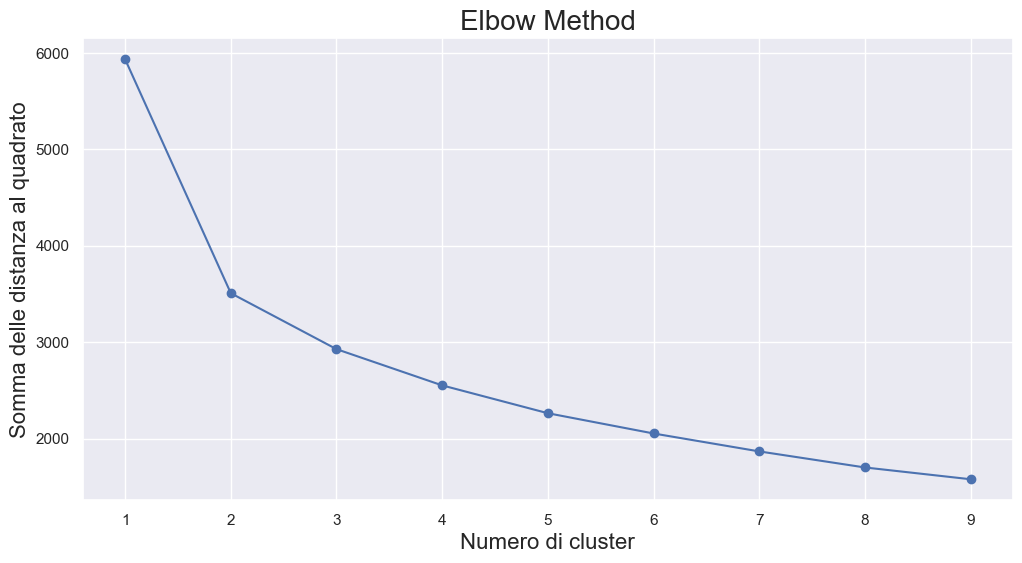

In [16]:
plot_ssd_curve(X)

##### Dal grafico si evince che il valore di K è pari a 3

### Funzione KMeans() con n_clusters = 3, fit del modello con valori di X e metodo predict(X)

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = RANDOM_SEED, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [18]:
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 2, ..., 1, 0, 2])

### Dataframe con i risultati del clustering

In [19]:
df_result = pd.DataFrame({
    "CUSTOMER_ID":df["CUST_ID"],
    "CUSTOMER_GROUP":y_pred+1,
})
df_result

,CUSTOMER_ID,CUSTOMER_GROUP
0,C10001,1
1,C10002,1
2,C10003,3
3,C10004,1
4,C10005,1
...,...,...
8945,C19186,2
8946,C19187,2
8947,C19188,2
8948,C19189,1


In [20]:
# Concatena i dataframe
df_customer_group = pd.concat([df_result, df_copy], axis=1)
df_customer_group

,CUSTOMER_ID,CUSTOMER_GROUP,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,1,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,3,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,2,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,1,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


##### Dalla analisi effettuata vengono evidenziati 3 diversi gruppi di clienti

### Discussione dei cluster per una campagna commerciale

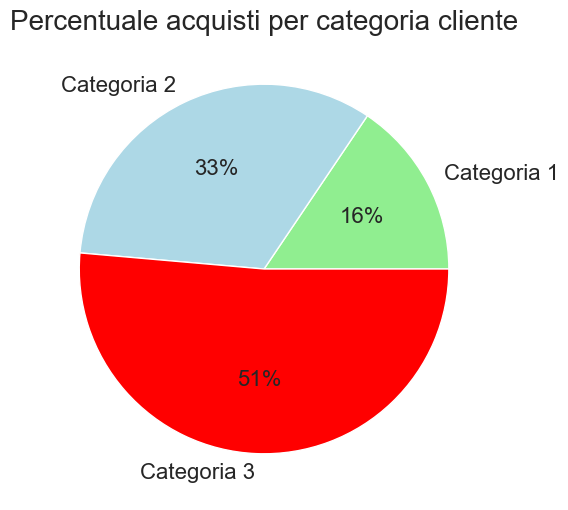

In [36]:
# Raggruppa gli acquisti per categoria
purchases = df_customer_group.groupby('CUSTOMER_GROUP')['PURCHASES'].sum()
labels = ['Categoria 1', 'Categoria 2', 'Categoria 3']
pie_colors = ['lightgreen', 'lightblue', 'red']

# Crea un pie chart
plt.pie(purchases, labels=labels, colors=pie_colors, autopct='%1.0f%%', textprops={'fontsize': 16})
plt.title('Percentuale acquisti per categoria cliente', fontsize=20, loc='center')
plt.show()

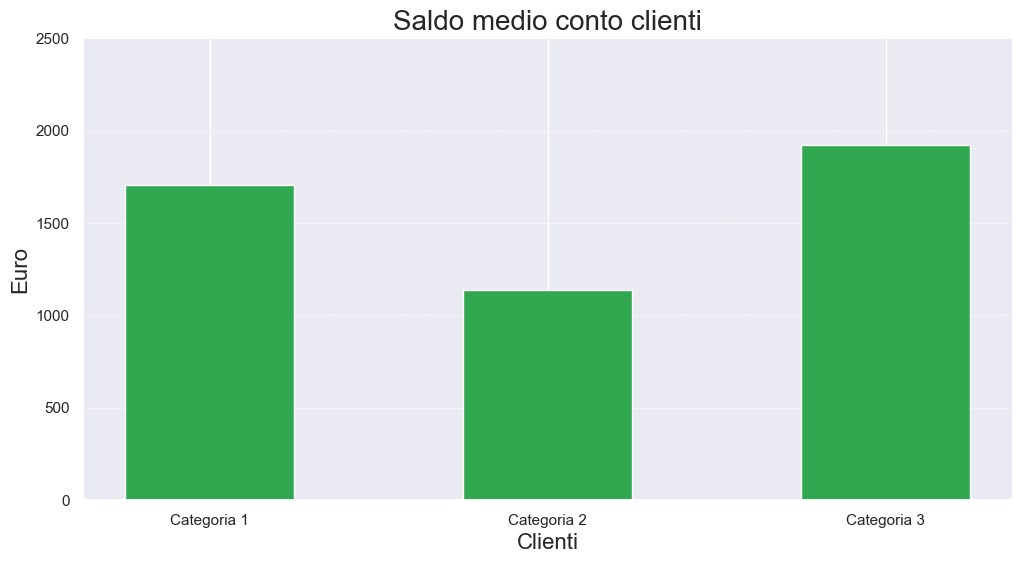

In [22]:
labels = ['Categoria 1', 'Categoria 2', 'Categoria 3']
balance = df_customer_group.groupby('CUSTOMER_GROUP')['BALANCE'].mean()

bar_width = 0.5

plt.bar(labels, balance, bar_width, color='#31a84f')

plt.title('Saldo medio conto clienti', fontsize=20)
plt.xlabel('Clienti', fontsize=16)
plt.ylabel('Euro', fontsize=16)
plt.ylim(0, 2500)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()

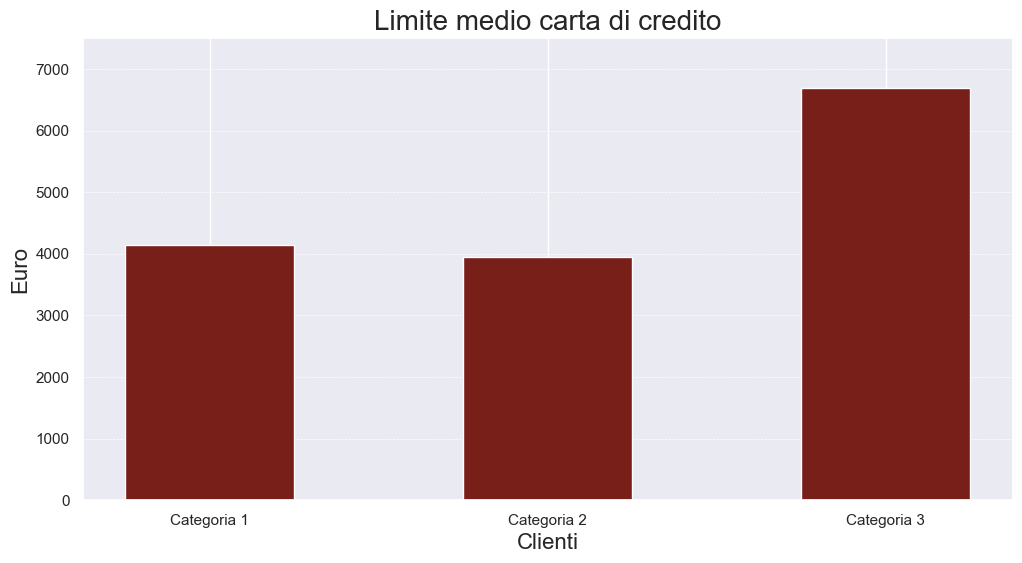

In [23]:
labels = ['Categoria 1', 'Categoria 2', 'Categoria 3']
credit_limit = df_customer_group.groupby('CUSTOMER_GROUP')['CREDIT_LIMIT'].mean()

bar_width = 0.5

plt.bar(labels, credit_limit, bar_width, color='#781f19')

plt.title('Limite medio carta di credito', fontsize=20)
plt.xlabel('Clienti', fontsize=16)
plt.ylabel('Euro', fontsize=16)
plt.ylim(0, 7500)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()

##### Possiamo notare come la "Categoria 1", con il 16% degli acquisti totali, sia quella che spende meno, pur avendo ancora un certo saldo a disposizione, e che quindi chiameremo del "Piccolo consumatore"; la "Categoria 2", con il 33% degli acquisti, circa 1/3 degli importi, è la categoria intermedia ovvero del "Medio consumatore", che ha tuttavia il minor saldo medio disponibile; infine la "Categoria 3", con il 51% degli acquisti, effettua oltre la metà degli acquisti totali, possiede il maggior saldo medio ed il limite di credito più elevato (circa il 40% in più), e quindi chiameremo "Grande consumatore".

##### Da un confronto tra i pagamenti effettuati dall'utente, l'uso o meno dei contanti e gli acquisti fatti in unica soluzione o a rate, possiamo trarre alcune conclusioni sulle diverse preferenze  per ogni categoria.
##### Iniziamo con le abitudini dei clienti relative all'uso del contante rispetto ai pagamenti

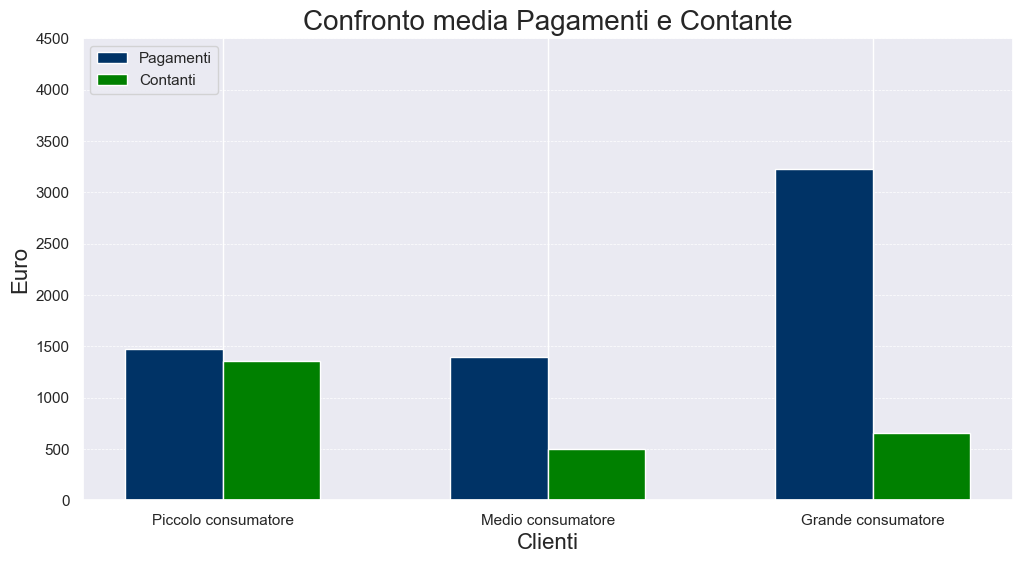

In [24]:
categories = ['Piccolo consumatore', 'Medio consumatore', 'Grande consumatore']
payments = df_customer_group.groupby('CUSTOMER_GROUP')['PAYMENTS'].mean()
purchases = df_customer_group.groupby('CUSTOMER_GROUP')['PURCHASES'].mean()
cash_advance = df_customer_group.groupby('CUSTOMER_GROUP')['CASH_ADVANCE'].mean()

# bar position on X axis
bar_width = 0.3
index = np.arange(len(categories)) 

# bar creation
plt.bar(index - bar_width/2, payments, bar_width, color='#003366', label='Pagamenti')
plt.bar(index + bar_width/2, cash_advance, bar_width, color='green', label='Contanti')

plt.title('Confronto media Pagamenti e Contante', fontsize=20)
plt.xlabel('Clienti', fontsize=16)
plt.ylabel('Euro', fontsize=16)
plt.ylim(0, 4500)

#show grid
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

#labels on X axis
plt.xticks(index, categories)

plt.legend(loc="upper left")

plt.show()


##### Dal bar chart si può notare come il piccolo consumatore preferisca effettuare i pagamenti soprattutto in contanti, il medio consumatore ne effettua una buona parte in contanti, mentre il grande consumatore solo una piccola parte

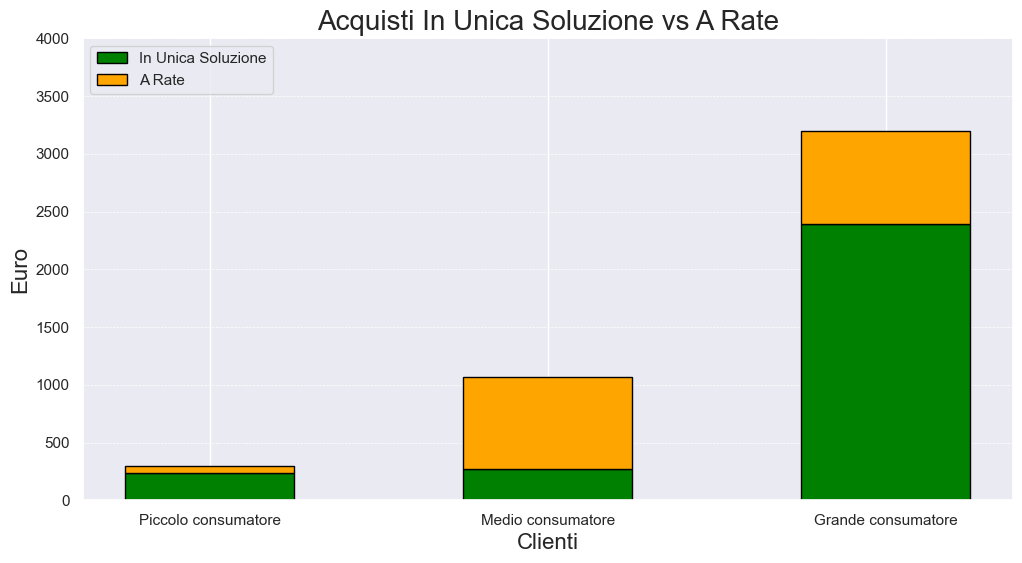

In [25]:
plt.title('Acquisti In Unica Soluzione vs A Rate', fontsize=20)
val1 = df_customer_group.groupby('CUSTOMER_GROUP')['ONEOFF_PURCHASES'].mean()
val2 = df_customer_group.groupby('CUSTOMER_GROUP')['INSTALLMENTS_PURCHASES'].mean()

barWidth = 0.5

# Imposta la posizione delle barre sul lato X
r = range(len(val1))

# First bar creation
plt.bar(r, val1, color='green', edgecolor='black', width=barWidth, label='In Unica Soluzione')

# Second bar creation upon first one
plt.bar(r, val2, bottom=val1, color='orange', edgecolor='black', width=barWidth, label='A Rate')

# Impostazioni varie per rendere il grafico più leggibile
plt.xlabel('Clienti', fontsize=16)
plt.xticks(r, categories)
plt.ylabel('Euro', fontsize=16)
plt.ylim(0, 4000)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.legend(loc="upper left")

plt.show()


##### Qui possiamo notare come il Medio consumatore effettui la maggior parte degli acquisti a rate, mentre il Piccolo consumatore, all'opposto, realizza quasi tutti gli acquisti in unica soluzione. Il Grande consumatore utilizza entrambre le modalità ma principalmente quella in unica soluzione.

### Infine concludo questa analisi con una rappresentazione della frequenza media degli acquisti per i consumatori

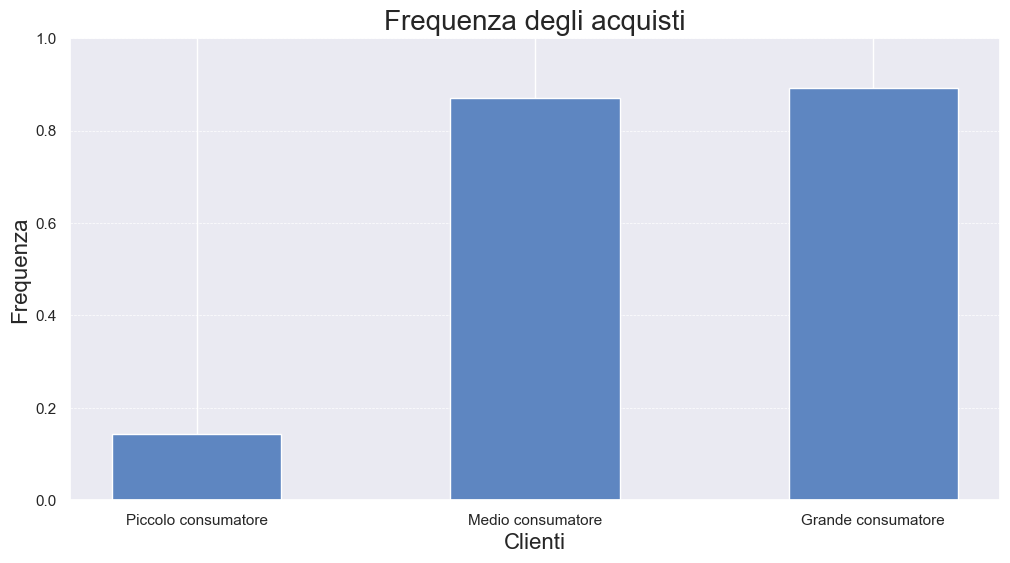

In [26]:
purchases_freq = df_customer_group.groupby('CUSTOMER_GROUP')['PURCHASES_FREQUENCY'].mean()

bar_width = 0.5

plt.bar(categories, purchases_freq, bar_width, color='#5e86c1')

plt.title('Frequenza degli acquisti', fontsize=20)
plt.xlabel('Clienti', fontsize=16)
plt.ylabel('Frequenza', fontsize=16)
plt.ylim(0, 1)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()

##### In questo grafico si nota come la frequenza degli acquisti del Medio consumatore sia molto superiore rispetto al Piccolo consumatore e vicina a quella del Grande consumatore che evidentemente effettua acquisti più costosi.

### File excel con i risultati

In [27]:
df_customer_group

,CUSTOMER_ID,CUSTOMER_GROUP,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,1,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,3,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,2,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,1,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [28]:
df_customer_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUSTOMER_ID                       8950 non-null   object 
 1   CUSTOMER_GROUP                    8950 non-null   int32  
 2   BALANCE                           8950 non-null   float64
 3   BALANCE_FREQUENCY                 8950 non-null   float64
 4   PURCHASES                         8950 non-null   float64
 5   ONEOFF_PURCHASES                  8950 non-null   float64
 6   INSTALLMENTS_PURCHASES            8950 non-null   float64
 7   CASH_ADVANCE                      8950 non-null   float64
 8   PURCHASES_FREQUENCY               8950 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 12  CASH_A

In [29]:
df_result['CUSTOMER_GROUP'] = df_result['CUSTOMER_GROUP'].astype(str)
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CUSTOMER_ID     8950 non-null   object
 1   CUSTOMER_GROUP  8950 non-null   object
dtypes: object(2)
memory usage: 140.0+ KB


In [30]:
client_mapping = {'1':"Piccolo consumatore", '2':"Medio consumatore", '3':"Grande consumatore"}

df_result['CUSTOMER_GROUP'] = df_result['CUSTOMER_GROUP'].map(client_mapping)
df_result

,CUSTOMER_ID,CUSTOMER_GROUP
0,C10001,Piccolo consumatore
1,C10002,Piccolo consumatore
2,C10003,Grande consumatore
3,C10004,Piccolo consumatore
4,C10005,Piccolo consumatore
...,...,...
8945,C19186,Medio consumatore
8946,C19187,Medio consumatore
8947,C19188,Medio consumatore
8948,C19189,Piccolo consumatore


In [31]:
df_result.to_excel("Segmentazione_clientela.xlsx", index=False)